### 1. Package ggplot2

Nah, untuk fungsi yang lebih powerful seperti menghasilkan grafik yang advanced (lanjut), kita perlu menggunakan package. 
Tambahkan code tersebut di bawah comment "#Menggunakan package ggplot2" dan jalankan kembali.

fakultas,jumlah_mahasiswa,akreditasi
<chr>,<dbl>,<chr>
Bisnis,260,A
D3 Perhotelan,28,A
ICT,284,B
Ilmu Komunikasi,465,A
Seni dan Desain,735,A


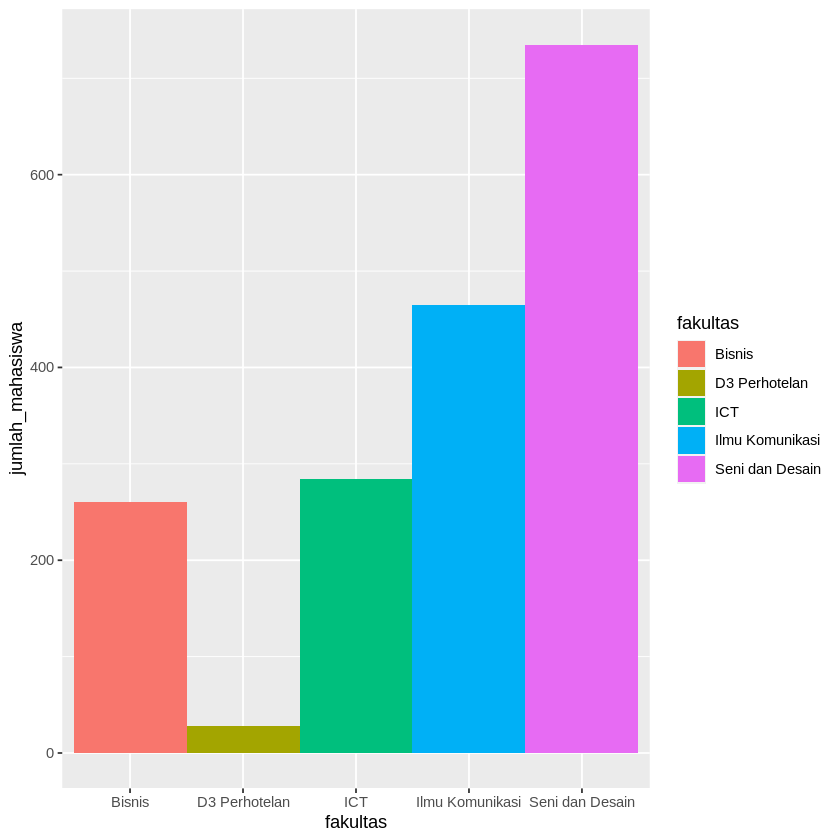

In [6]:
fakultas <- c("Bisnis", "D3 Perhotelan", "ICT", "Ilmu Komunikasi", "Seni dan Desain")
jumlah_mahasiswa <- c(260, 28, 284, 465, 735)
akreditasi <- c("A","A","B","A","A")

info_mahasiswa <- data.frame(fakultas, jumlah_mahasiswa, akreditasi)
info_mahasiswa

#Menggunakan package ggplot2
library("ggplot2")

#Membuat kanvas
gambar <- ggplot(info_mahasiswa, aes(x=fakultas, y=jumlah_mahasiswa, fill=fakultas))
gambar <- gambar + geom_bar(width=1, stat="identity")
gambar

### 2. Membuat Grafik Sebaran Mahasiswa (1)

Cara membuat grafik di R bisa menggunakan banyak cara, salah satunya dengan library ggplot2 - dimana kita menggambar chart secara bertahap, yaitu dengan konsep layering (lapisan demi lapisan).



fakultas,jumlah_mahasiswa,akreditasi
<chr>,<dbl>,<chr>
Bisnis,260,A
D3 Perhotelan,28,A
ICT,284,B
Ilmu Komunikasi,465,A
Seni dan Desain,735,A


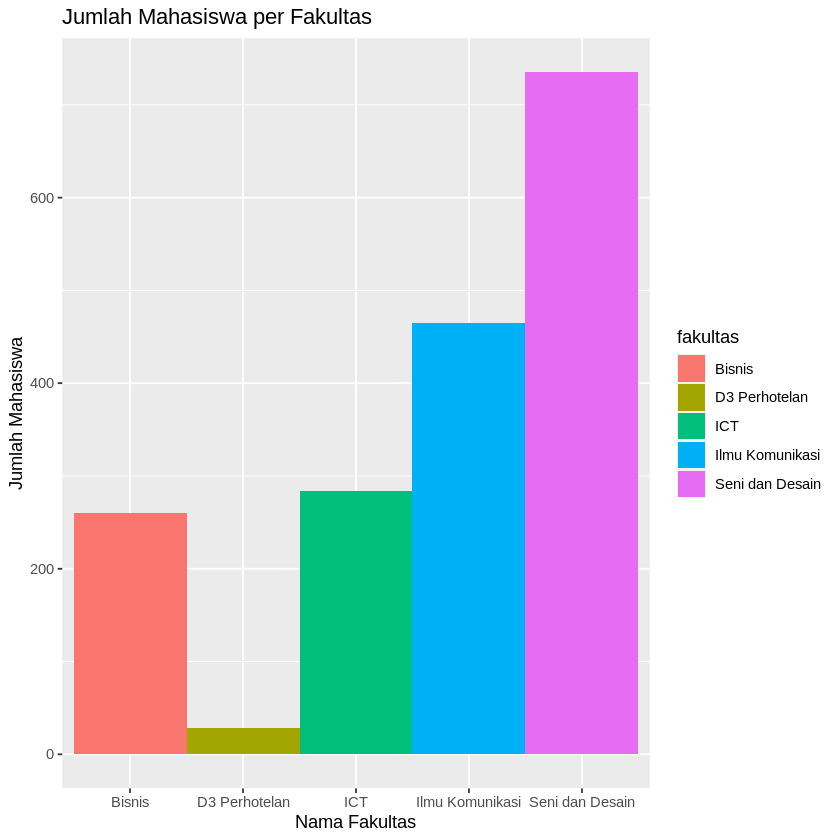

In [7]:
#Membuat dua vector
fakultas <- c("Bisnis", "D3 Perhotelan", "ICT", "Ilmu Komunikasi", "Seni dan Desain")
jumlah_mahasiswa <- c(260, 28, 284, 465, 735)
akreditasi <- c("A","A","B","A","A")

#Buat data frame dari ketiga vector di atas
info_mahasiswa <- data.frame(fakultas, jumlah_mahasiswa, akreditasi)
info_mahasiswa

#Menggunakan package ggplot2
library(ggplot2)

#Membuat kanvas
gambar <- ggplot(info_mahasiswa, aes(x=fakultas, y=jumlah_mahasiswa, fill=fakultas))

#Menambahkan objek bar chart, simpan kembali sebagai variable gambar
gambar <- gambar + geom_bar(width=1, stat="identity")

#Menambahkan judul grafik
gambar <- gambar + ggtitle("Jumlah Mahasiswa per Fakultas")
#Menambahkan caption pada sumbu x
gambar <- gambar + xlab ("Nama Fakultas")
#Menambahkan caption pada sumbu y
gambar <- gambar + ylab ("Jumlah Mahasiswa")
#Menggambar grafik
gambar

### 3. Membaca File Excel
Secara umum, pengolahan data di R mengharuskan membaca file dari spreadsheet, contohnya Excel.

In [14]:
install.packages("openxlsx")
#Menggunakan package ggplot2
library(ggplot2)
#Menggunakan package openxlsx
library(openxlsx)

#Membaca file mahasiswa.xlsx
mahasiswa <- read.xlsx("https://storage.googleapis.com/dqlab-dataset/mahasiswa.xlsx",sheet = "Sheet 1")

#Menampilkan data
print(mahasiswa)

#Menampilkan kolom Prodi
print(mahasiswa$Prodi)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’



Attaching package: ‘openxlsx’


The following objects are masked from ‘package:xlsx’:

    createWorkbook, loadWorkbook, read.xlsx, saveWorkbook, write.xlsx




   ANGKATAN        Fakultas                          Prodi  Kode JUMLAH
1      2015          Bisnis                      Akuntansi  AKUN     88
2      2016          Bisnis                      Akuntansi  AKUN     85
3      2017          Bisnis                      Akuntansi  AKUN    103
4      2016 Seni dan Desain                        Arsitek    AR     28
5      2017 Seni dan Desain                        Arsitek    AR     45
6      2015 Seni dan Desain       Desain Komunikasi Visual   DKV    279
7      2016 Seni dan Desain       Desain Komunikasi Visual   DKV    314
8      2017 Seni dan Desain       Desain Komunikasi Visual   DKV    337
9      2015 Seni dan Desain              Film dan Televisi   FTV    284
10     2016 Seni dan Desain              Film dan Televisi   FTV    274
11     2017 Seni dan Desain              Film dan Televisi   FTV    300
12     2015 Ilmu Komunikasi                Ilmu Komunikasi ILKOM    499
13     2016 Ilmu Komunikasi                Ilmu Komunikasi ILKOM

### 4. Membuat Grafik Sebaran Mahasiswa (2)

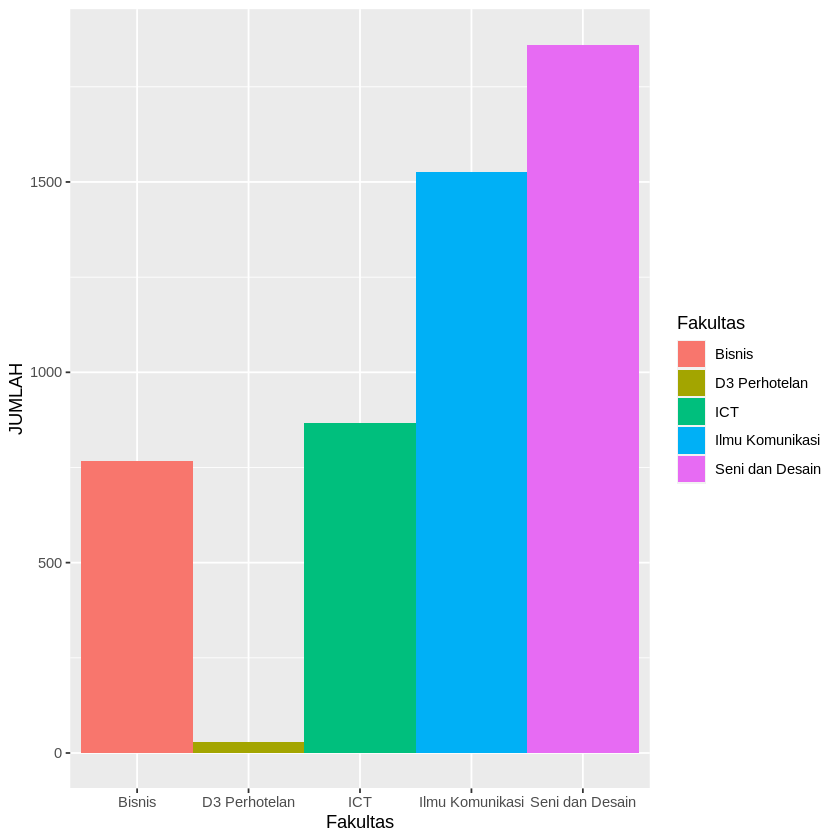

In [15]:
library(ggplot2)
#Menggunakan package openxlsx
library(openxlsx)

#Membaca file mahasiswa.xlsx
mahasiswa <- read.xlsx("https://storage.googleapis.com/dqlab-dataset/mahasiswa.xlsx",sheet = "Sheet 1")

#Membuat kanvas
gambar <- ggplot(mahasiswa, aes(x=Fakultas, y=JUMLAH, fill=Fakultas))

#Menambahkan objek bar chart, simpan kembali sebagai variable gambar
gambar <- gambar + geom_bar(width=1, stat="identity")

#Menggambar grafik
gambar

### 5. Trend Jumlah Mahasiswa dari Tahun ke Tahun
Grafik batang yang telah ditampilkan sebelumnya cukup baik. Namun, informasi yang terkandung masih belum diekplorasi lebih detail. Sebagai contoh, bagaimanakah jika kita ingin melihat trend jumlah mahasiswa tiap fakultas dari tahun ke tahun?

fakultas,tahun,jumlah_mahasiswa
<chr>,<dbl>,<dbl>
Bisnis,2015,257
ICT,2015,249
Ilmu Komunikasi,2015,500
Seni dan Desain,2015,563
Bisnis,2016,248
ICT,2016,294
Ilmu Komunikasi,2016,526
Seni dan Desain,2016,616
Bisnis,2017,263


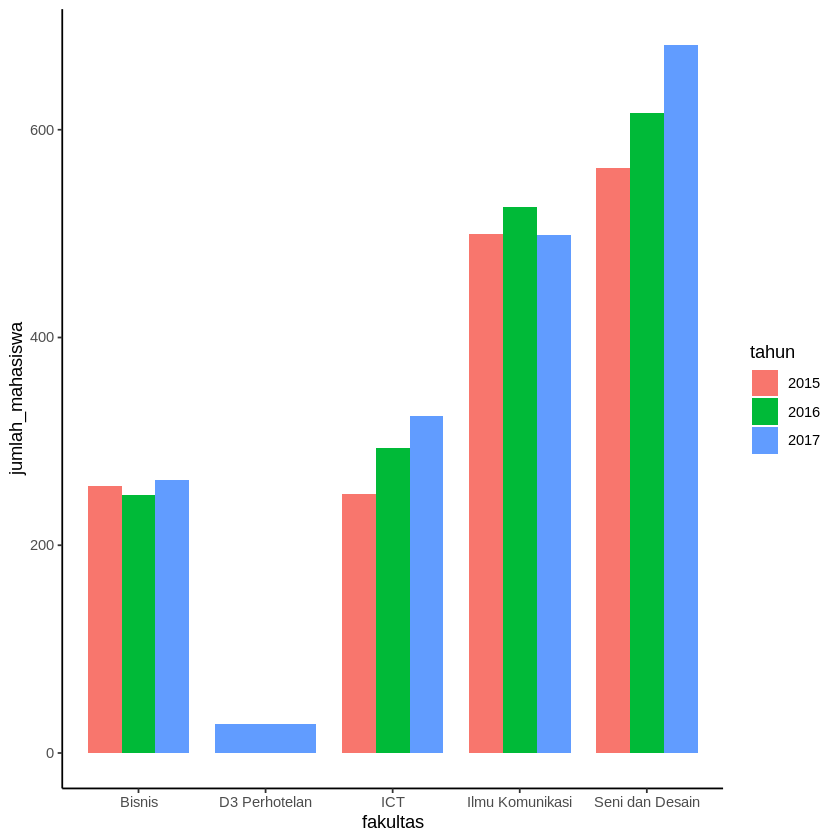

In [16]:
library(ggplot2)
#Menggunakan package openxlsx
library(openxlsx)

#Membaca file mahasiswa.xlsx
mahasiswa <- read.xlsx("https://storage.googleapis.com/dqlab-dataset/mahasiswa.xlsx",sheet = "Sheet 1")

#Menghitung Jumlah Data by Fakultas
summarybyfakultas <- aggregate(x=mahasiswa$JUMLAH, by=list(Kategori=mahasiswa$Fakultas, Tahun=mahasiswa$ANGKATAN), FUN=sum)
summarybyfakultas <- setNames(summarybyfakultas, c("fakultas","tahun", "jumlah_mahasiswa"))
summarybyfakultas

summarybyfakultas$tahun = as.factor(summarybyfakultas$tahun)

ggplot(summarybyfakultas, aes(x=fakultas, y=jumlah_mahasiswa)) + 
  geom_bar(stat = "identity", aes(fill = tahun), width=0.8, position = position_dodge(width=0.8)) + 
  theme_classic() 


### 6. Pie Chart
Pie chart merupakan chart favorit bagi banyak analis untuk menunjukkan proporsi data. Berdasarkan data frame mahasiswa, jumlah mahasiswa per fakultas adalah kasus proporsi yang dapat ditampilkan dengan pie chart.

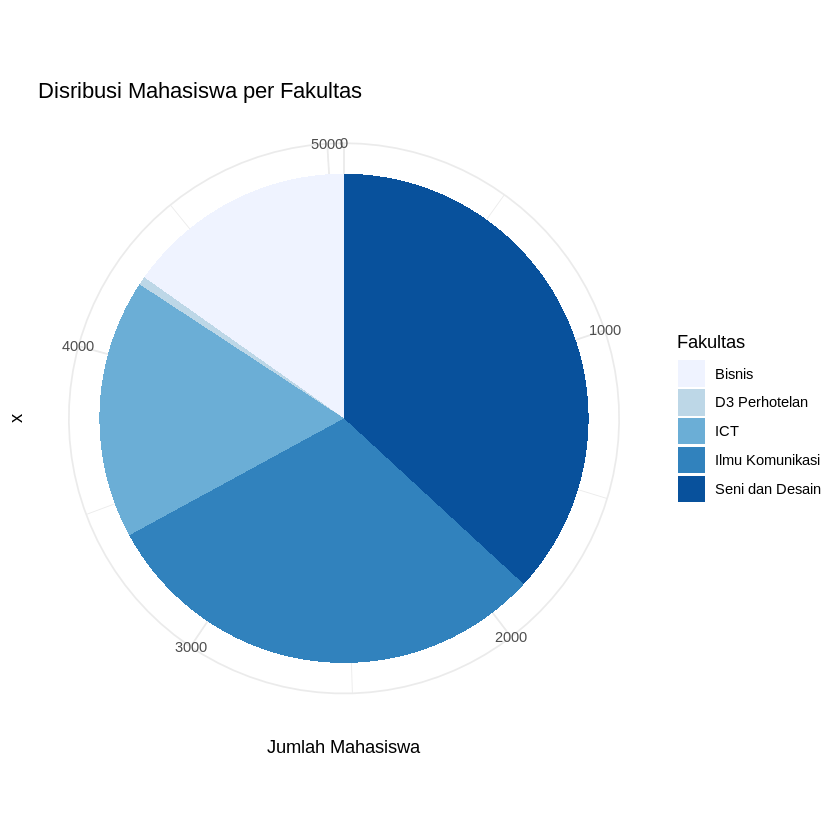

In [17]:
library(ggplot2)
library(openxlsx)
#Membaca file mahasiswa.xlsx
mahasiswa <- read.xlsx("https://storage.googleapis.com/dqlab-dataset/mahasiswa.xlsx",sheet = "Sheet 1")

#Menghitung Jumlah Data by Fakultas
summarybyfakultas <- aggregate(x=mahasiswa$JUMLAH, by=list(Kategori=mahasiswa$Fakultas), FUN=sum)
summarybyfakultas <- setNames(summarybyfakultas, c("fakultas","jumlah_mahasiswa"))

piechart<- ggplot(summarybyfakultas, aes(x="", y=jumlah_mahasiswa, fill=fakultas))+ geom_bar(width = 1, stat = "identity")
piechart <- piechart + coord_polar("y", start=0)
piechart <- piechart + ggtitle("Disribusi Mahasiswa per Fakultas")
piechart <- piechart + scale_fill_brewer(palette="Blues")+ theme_minimal()
piechart <- piechart + guides(fill=guide_legend(title="Fakultas"))
piechart <- piechart + ylab("Jumlah Mahasiswa") 
piechart


### 7. Filtering
Demo terakhir pada bab ini adalah melakukan filtering data sebelum ditampilkan dalam bentuk grafik. 

Pengerjaan filtering di data frame dapat dilakukan dengan menambahkan operator %in% dengan input berupa vector. Kode yang digunakan untuk melakukan filtering ini sudah terdapat pada Code Editor.

fakultas,tahun,jumlah_mahasiswa
<chr>,<dbl>,<dbl>
Bisnis,2015,257
ICT,2015,249
Ilmu Komunikasi,2015,500
Seni dan Desain,2015,563
Bisnis,2016,248
ICT,2016,294
Ilmu Komunikasi,2016,526
Seni dan Desain,2016,616
Bisnis,2017,263


,fakultas,tahun,jumlah_mahasiswa
,<chr>,<fct>,<dbl>
2,ICT,2015,249
3,Ilmu Komunikasi,2015,500
6,ICT,2016,294
7,Ilmu Komunikasi,2016,526
11,ICT,2017,324
12,Ilmu Komunikasi,2017,499


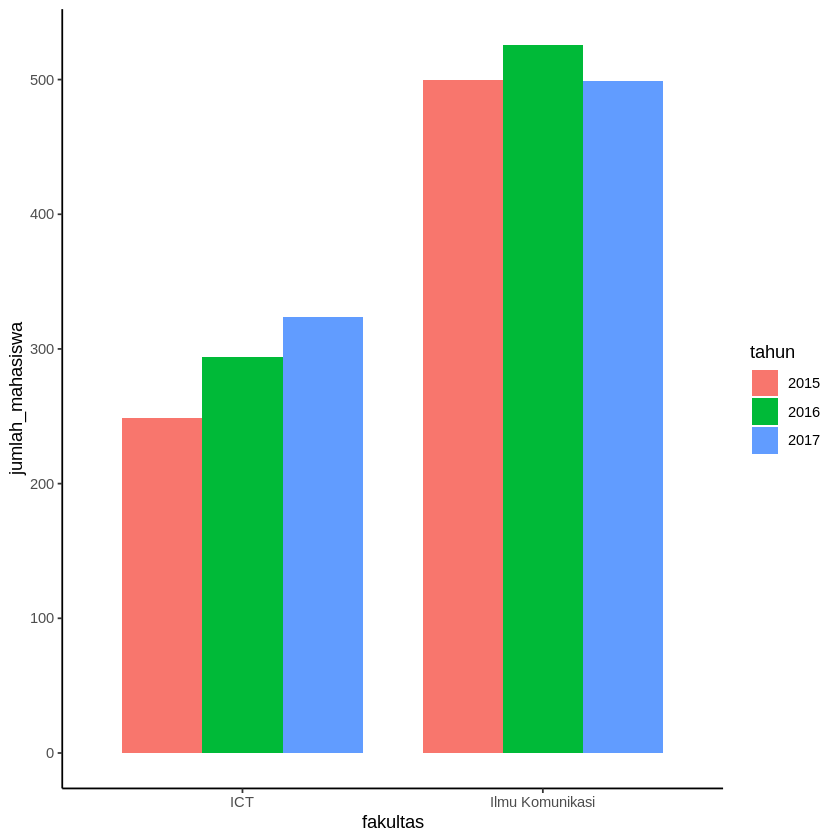

In [18]:
library("ggplot2")
library("openxlsx")

#Membaca file mahasiswa.xlsx
mahasiswa <- read.xlsx("https://storage.googleapis.com/dqlab-dataset/mahasiswa.xlsx",sheet = "Sheet 1")

#Menghitung Jumlah Data by Fakultas
summarybyfakultas <- aggregate(x=mahasiswa$JUMLAH, by=list(Kategori=mahasiswa$Fakultas, Tahun=mahasiswa$ANGKATAN), FUN=sum)
summarybyfakultas <- setNames(summarybyfakultas, c("fakultas","tahun", "jumlah_mahasiswa"))
summarybyfakultas

summarybyfakultas$tahun = as.factor(summarybyfakultas$tahun)
summarybyfakultas[summarybyfakultas$fakultas %in% c("ICT", "Ilmu Komunikasi"),]

ggplot(summarybyfakultas[summarybyfakultas$fakultas %in% c("ICT", "Ilmu Komunikasi"),], aes(x=fakultas, y=jumlah_mahasiswa)) + 
  geom_bar(stat = "identity", aes(fill = tahun), width=0.8, position = position_dodge(width=0.8)) + 
  theme_classic() 
